In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('triple_agent').resolve())
sys.path.append(project_path)

In [46]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.action_tests import ActionTest
from triple_agent.utilities.outcomes import WinType
from triple_agent.utilities.missions import Missions
from triple_agent.reports.mission_choices import mission_choices
from triple_agent.reports.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_role)
from triple_agent.reports.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.reports.seduce import first_flirt_timing
from triple_agent.utilities.event_constants import SCL5_PICK_MODES, SCL5_VENUE_MODES
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.mission_progress import mission_progress
from triple_agent.reports.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.utilities.roles import Roles

In [43]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

In [9]:
player = 'Calvin Schoolidge'

In [10]:
opp_spy_replays = get_parsed_replays(lambda g: g.spy == player)
opp_sniper_replays = get_parsed_replays(lambda g: g.sniper == player)

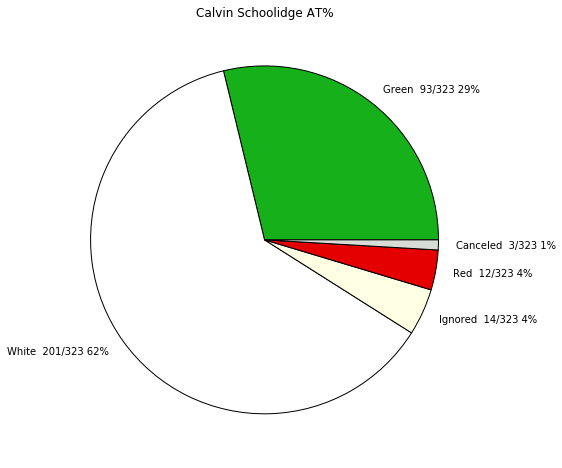

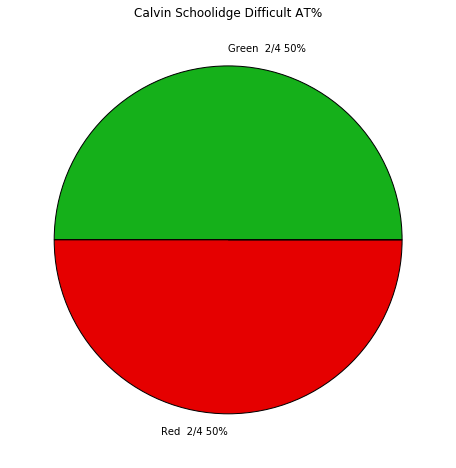

In [11]:
action_test_percentages(opp_spy_replays, f"{player} AT%")
diff_action_test_percentages(opp_spy_replays, f"{player} Difficult AT%")

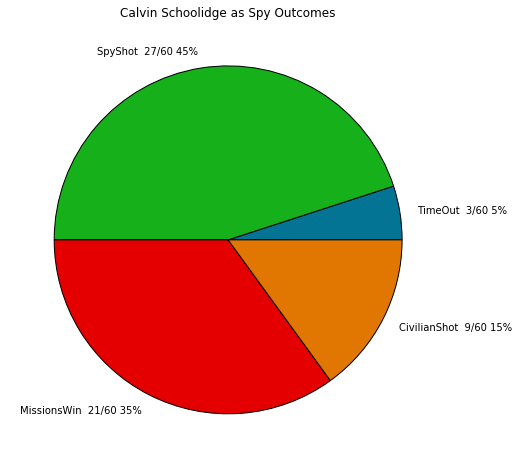

In [12]:
game_outcomes(opp_spy_replays, f"{player} as Spy Outcomes")

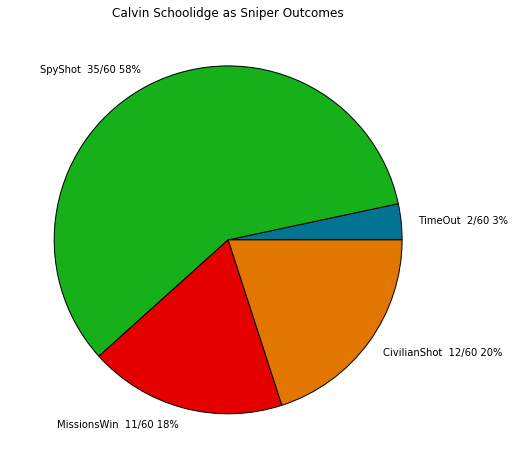

In [14]:
game_outcomes(opp_sniper_replays, f"{player} as Sniper Outcomes")

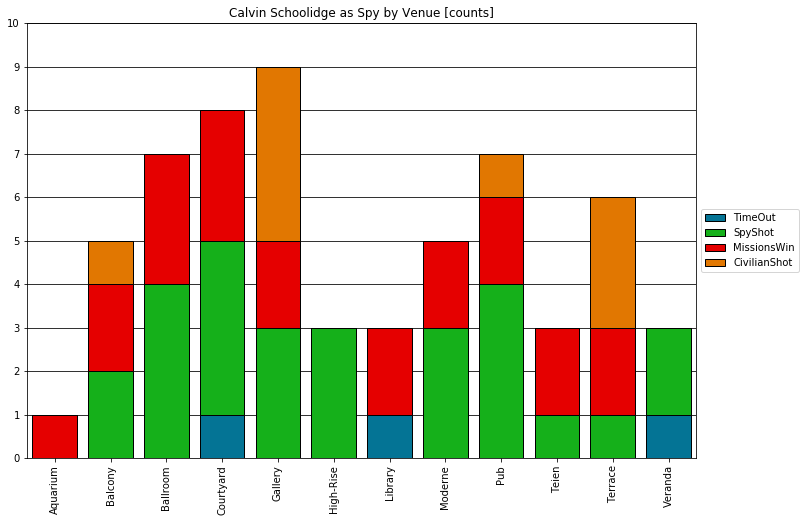

In [15]:
game_outcomes(opp_spy_replays, f"{player} as Spy by Venue", groupby=lambda g: g.venue, percentile_plot=False)

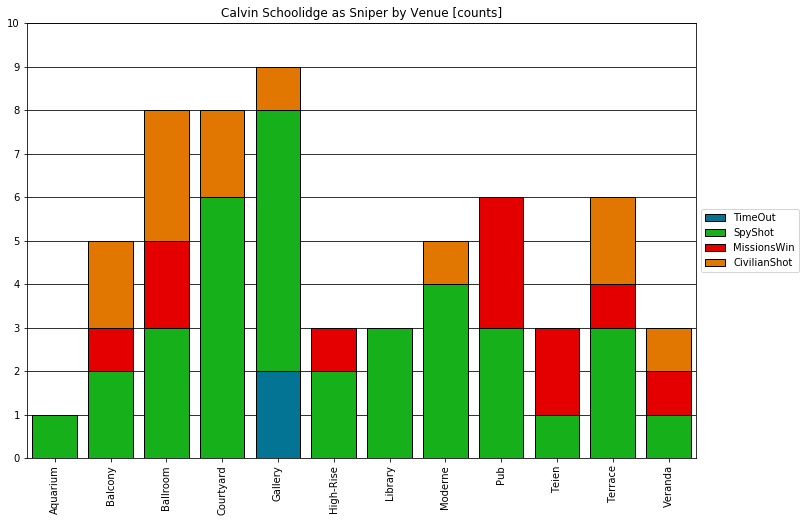

In [16]:
game_outcomes(opp_sniper_replays, f"{player} as Sniper by Venue", groupby=lambda g: g.venue, percentile_plot=False)

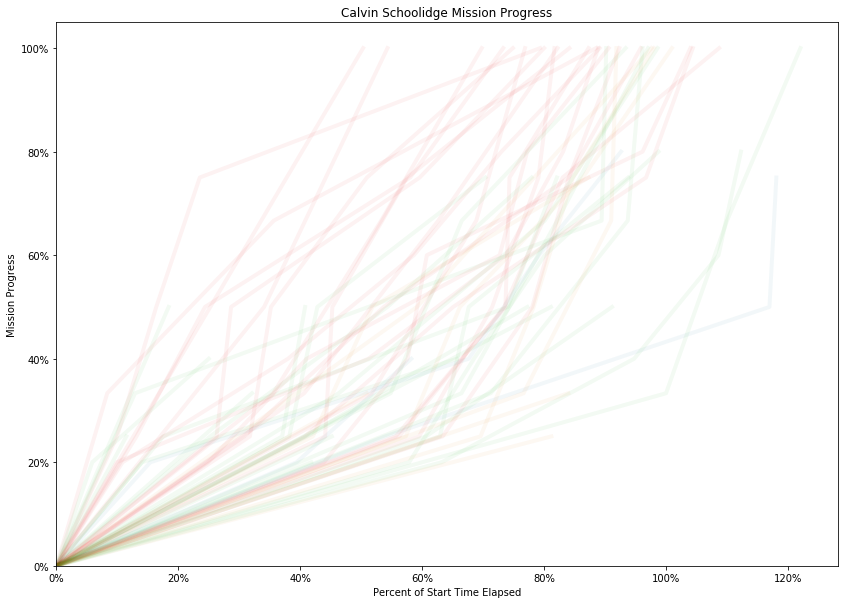

In [13]:
mission_progress(opp_spy_replays, f"{player} Mission Progress")

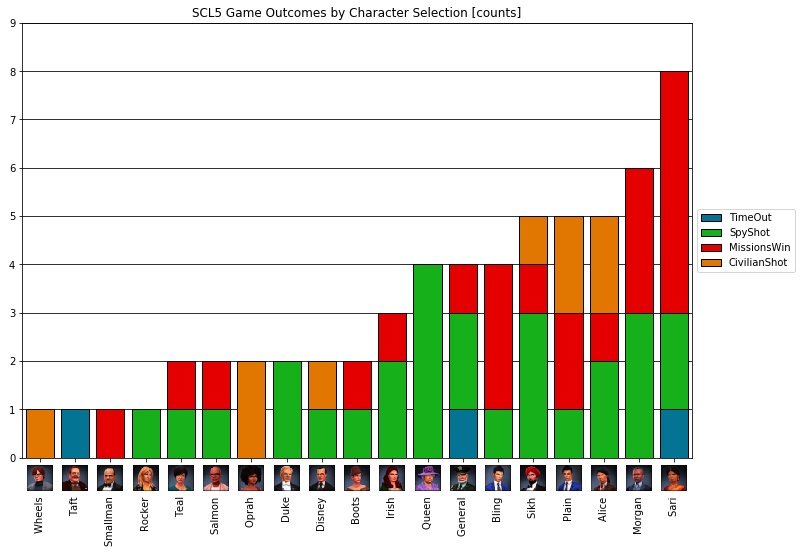

In [47]:
game_outcomes(
    opp_spy_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sum,
    portrait_x_axis=True,
    reversed_data_sort=True,
    percentile_plot=False
)

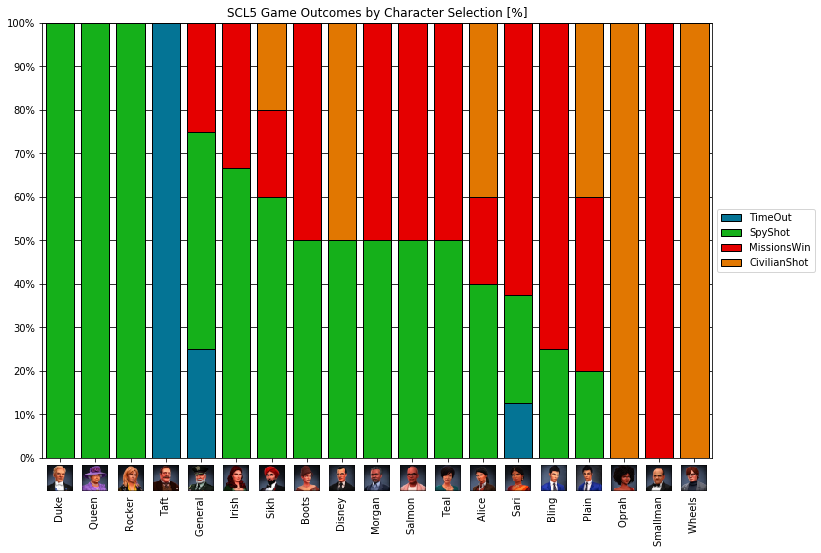

In [48]:
game_outcomes(
    opp_spy_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sort_by_spy_wins,
    portrait_x_axis=True,
    counts_plot=False
)

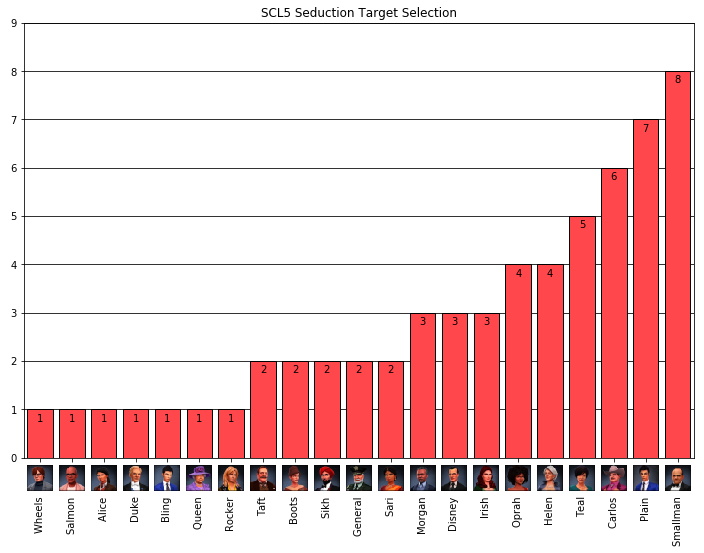

In [49]:
st_selection(opp_spy_replays, "SCL5 Seduction Target Selection", percentile_plot=False, category_data_order=sum)

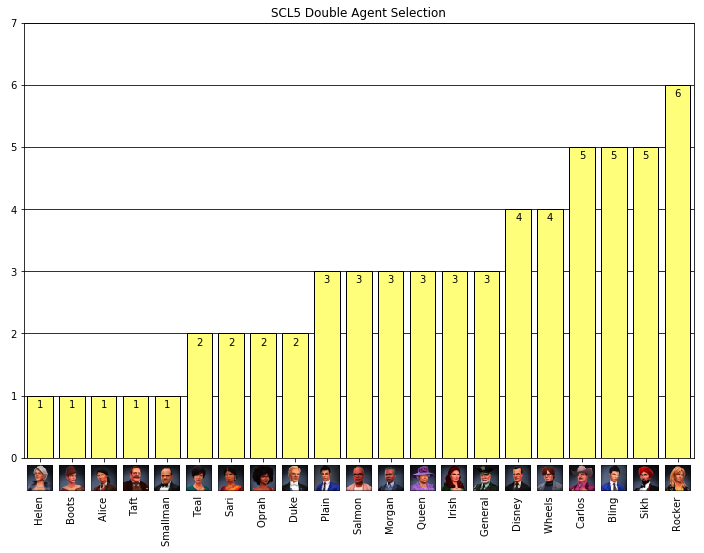

In [50]:
double_agent_selection(opp_spy_replays, "SCL5 Double Agent Selection", percentile_plot=False, category_data_order=sum)

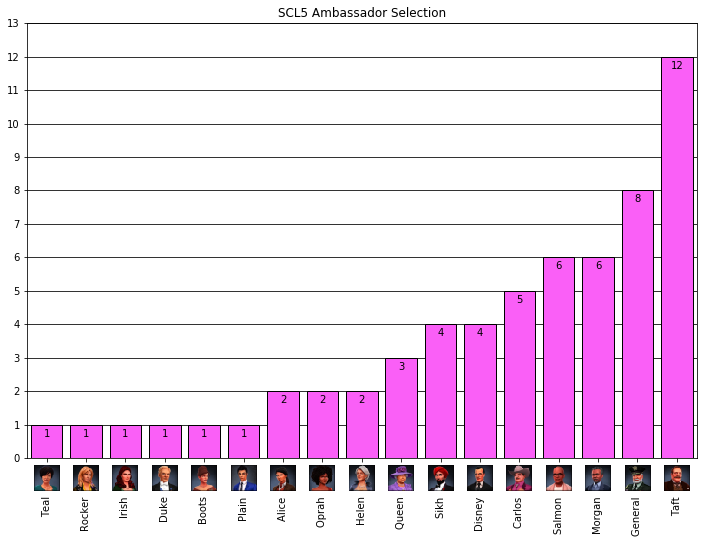

In [51]:
amba_selection(opp_spy_replays, "SCL5 Ambassador Selection", percentile_plot=False, category_data_order=sum)

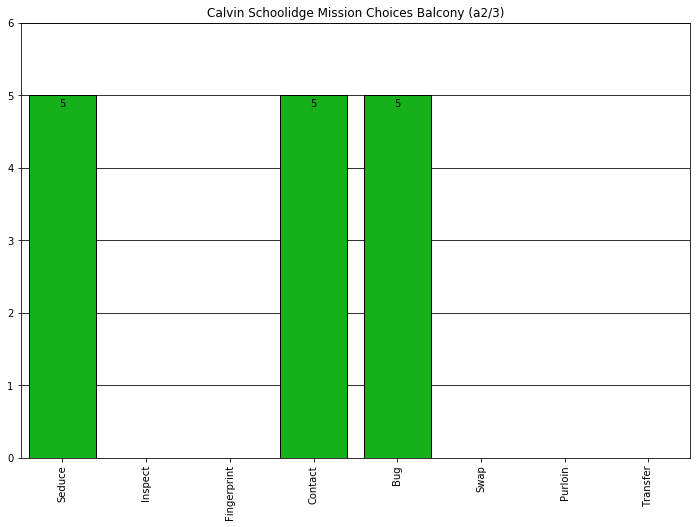

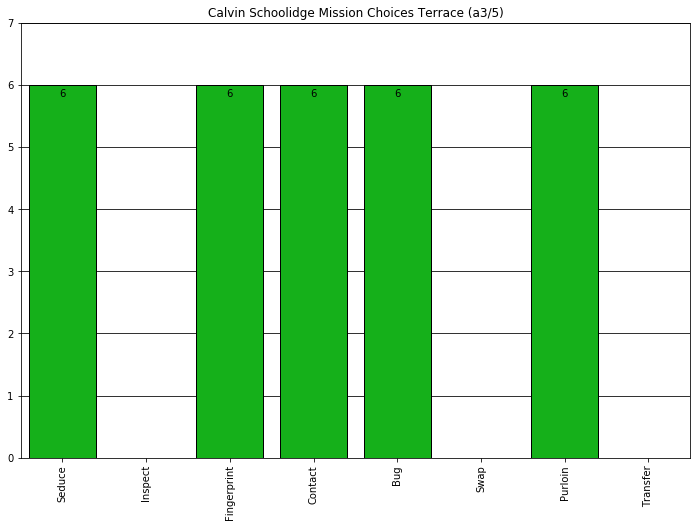

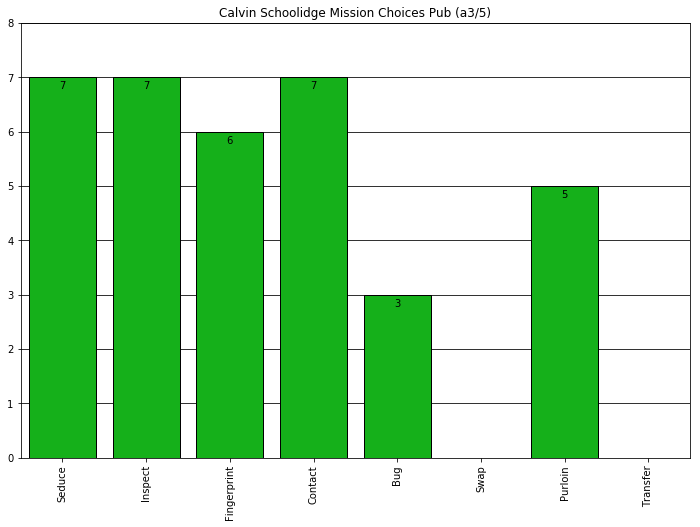

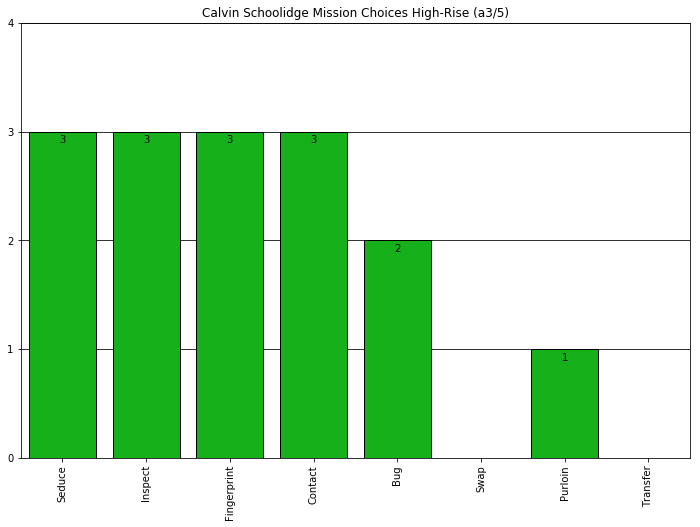

In [23]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, opp_spy_replays)
    mission_choices(venue_games,
                    f"{player} Mission Choices {venue} ({mode})",
                    force_bar=True,
                    category_data_order=sum,
                    percentile_plot=False)

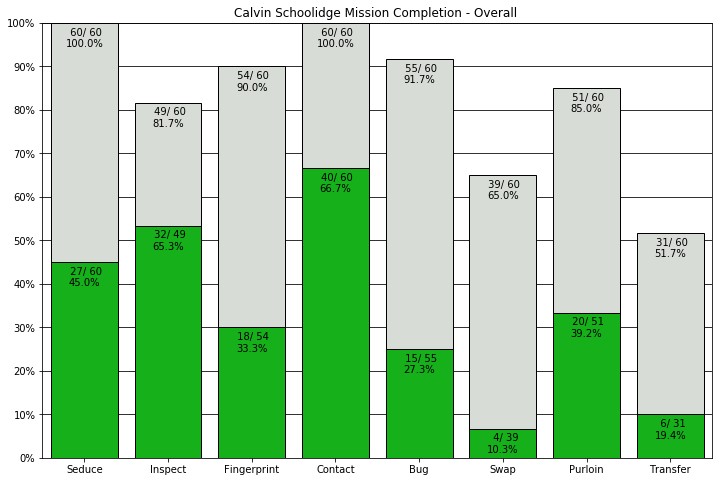

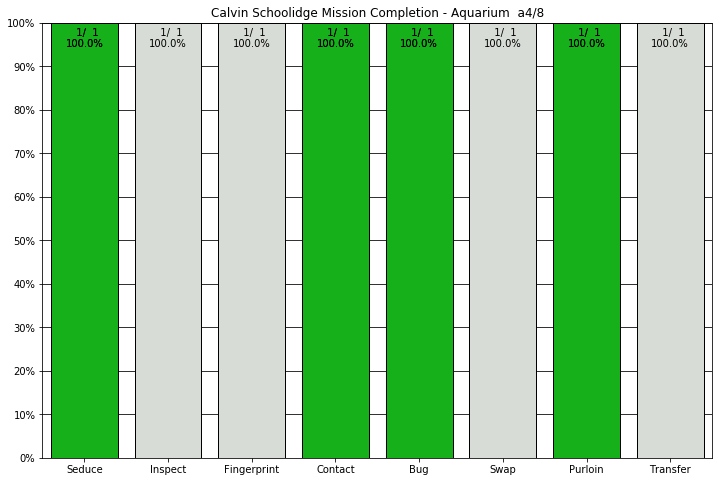

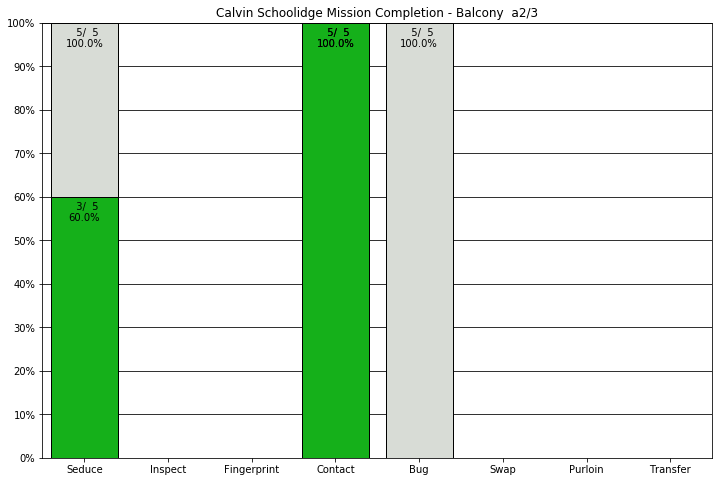

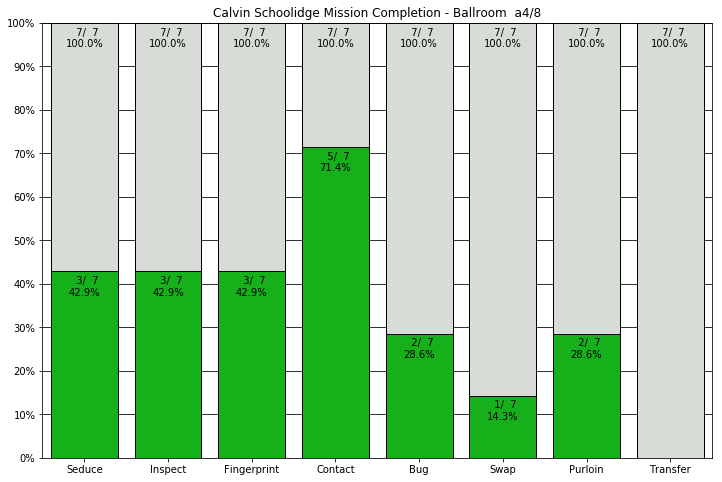

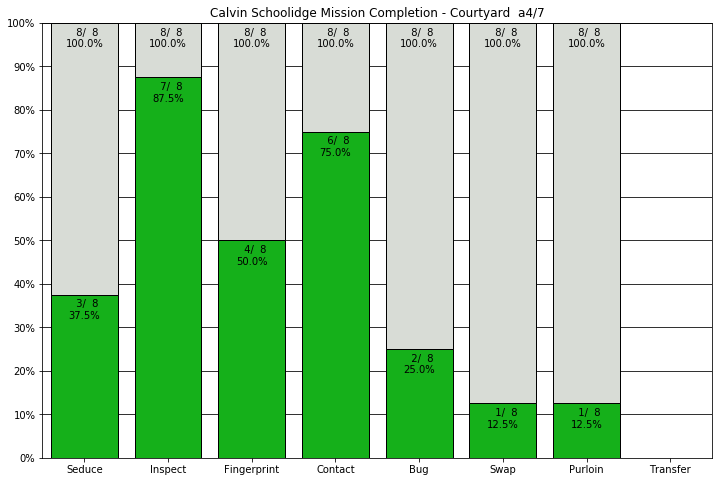

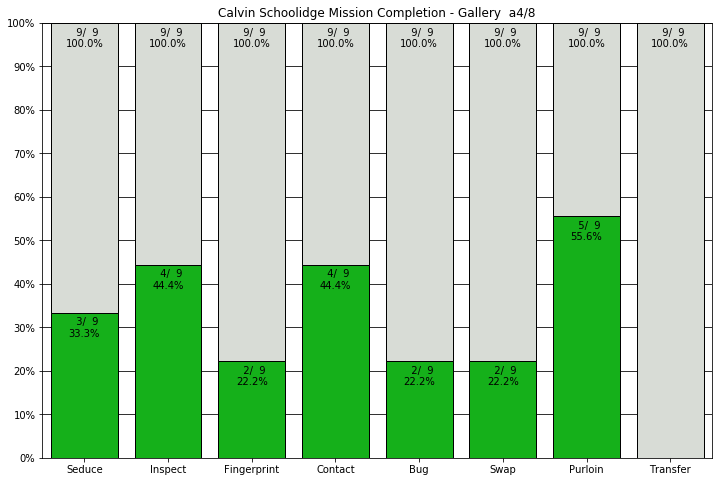

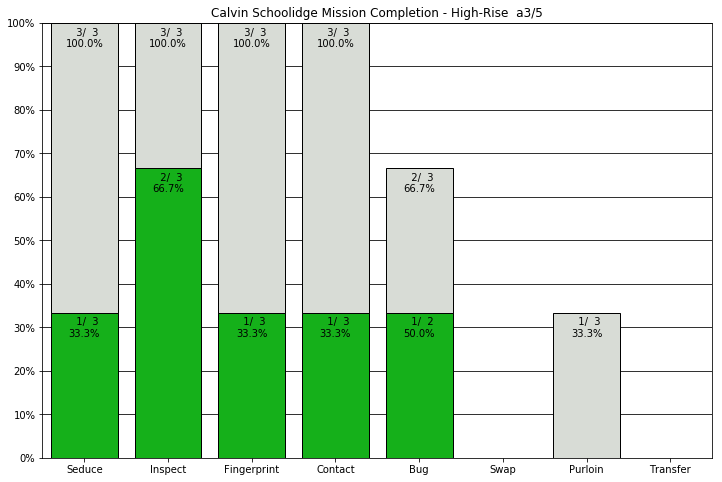

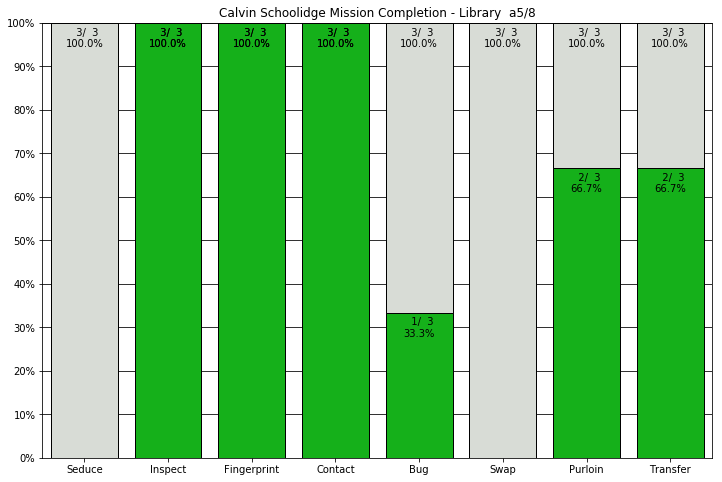

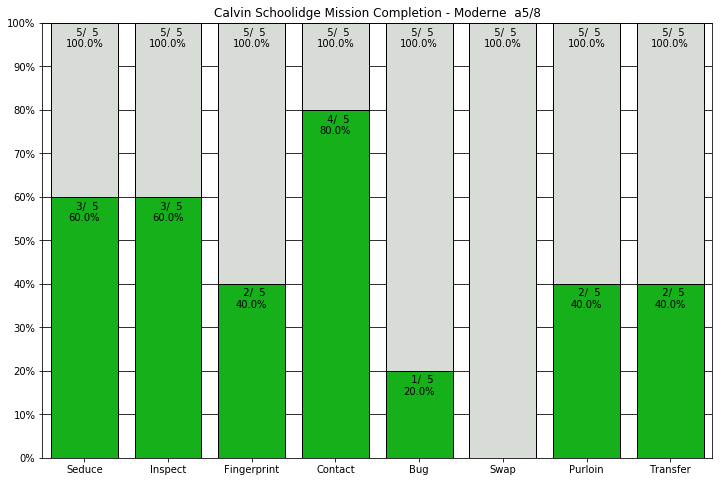

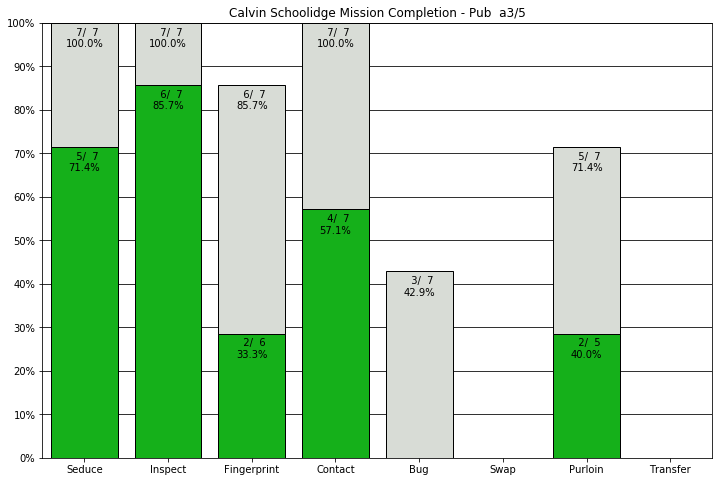

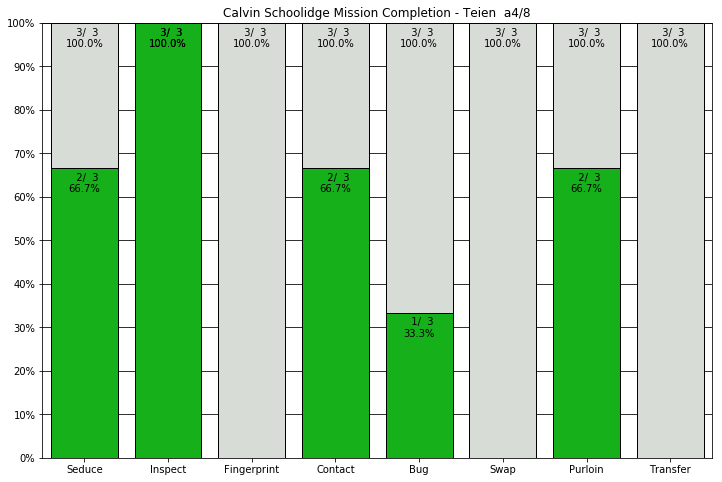

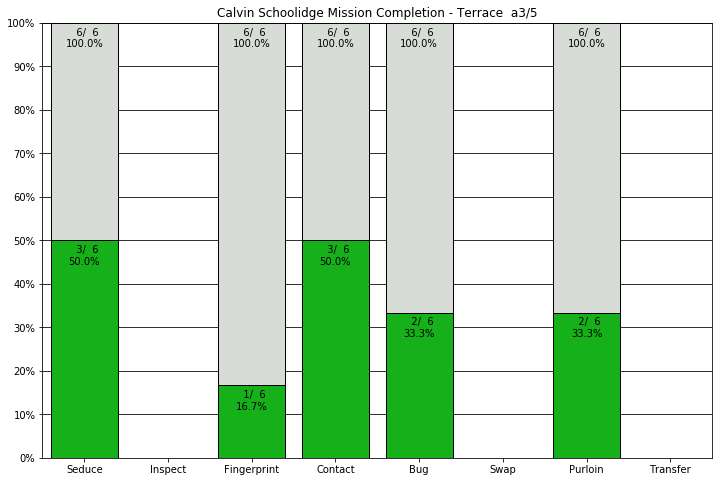

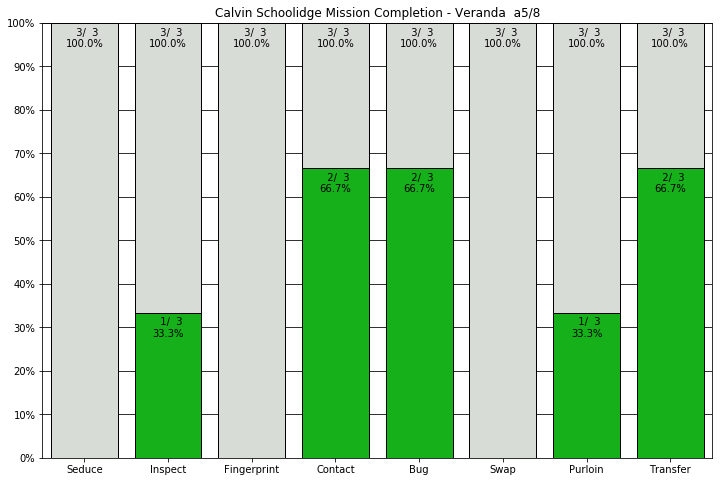

In [24]:
mission_completion(opp_spy_replays, f"{player} Mission Completion", SCL5_VENUE_MODES)

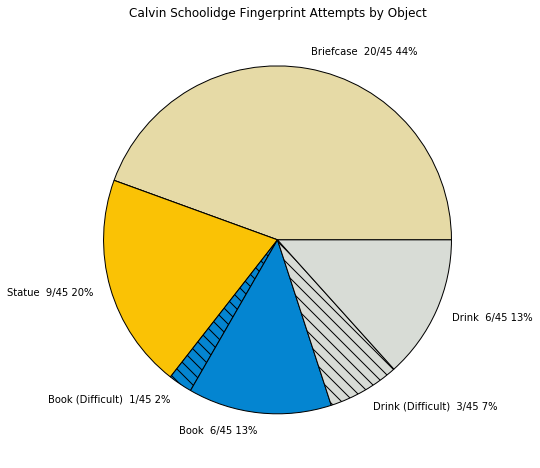

In [25]:
attempted_fingerprint_sources(opp_spy_replays, f"{player} Fingerprint Attempts by Object")

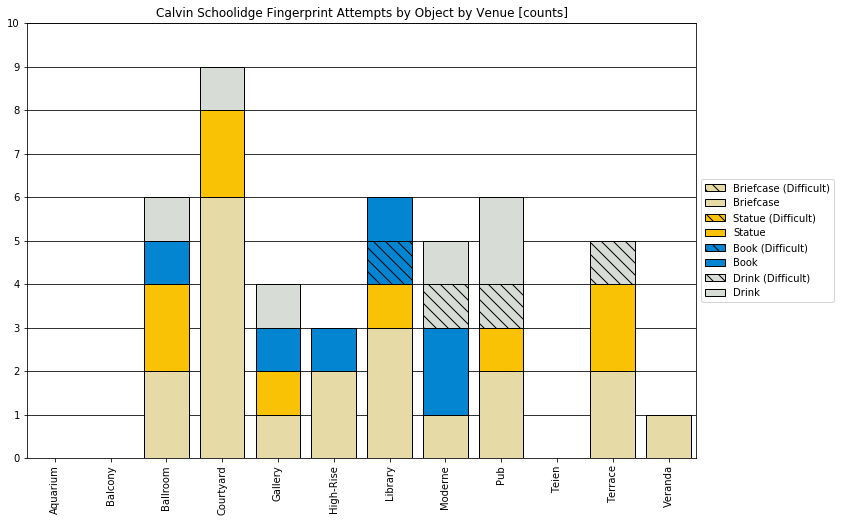

In [26]:
attempted_fingerprint_sources(
    opp_spy_replays,
    f"{player} Fingerprint Attempts by Object by Venue",
    groupby=lambda g: g.venue,
    percentile_plot=False)

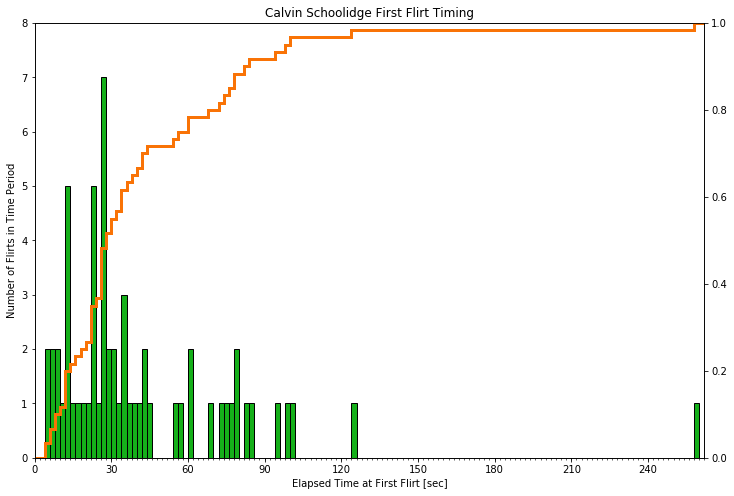

In [27]:
first_flirt_timing(opp_spy_replays, f"{player} First Flirt Timing")

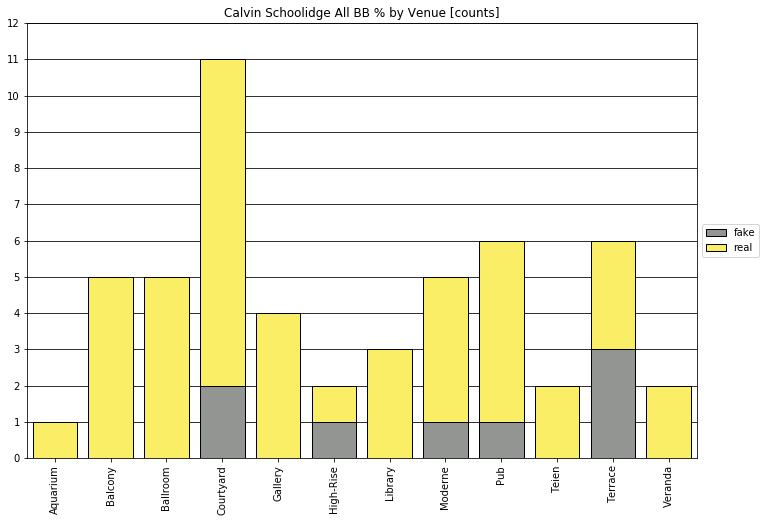

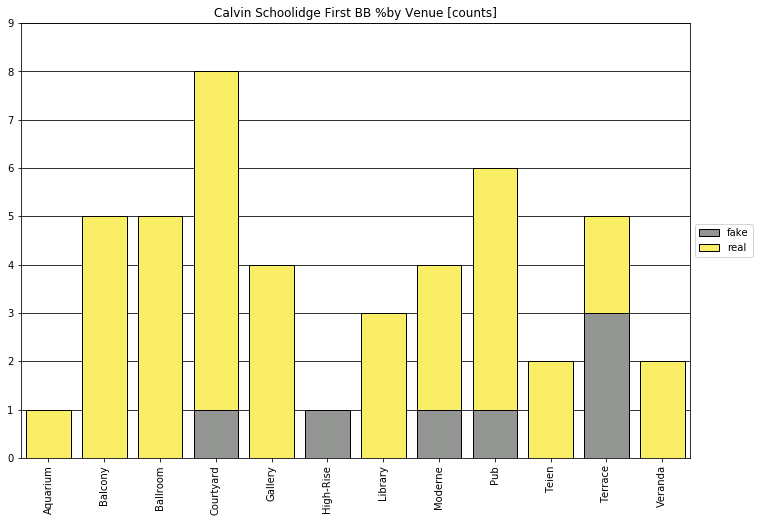

In [28]:
all_banana_bread_percentages(opp_spy_replays, f"{player} All BB % by Venue",
    groupby=lambda g: g.venue,
    percentile_plot=False)
first_banana_bread_percentages(opp_spy_replays, f"{player} First BB %by Venue",
    groupby=lambda g: g.venue,
    percentile_plot=False)

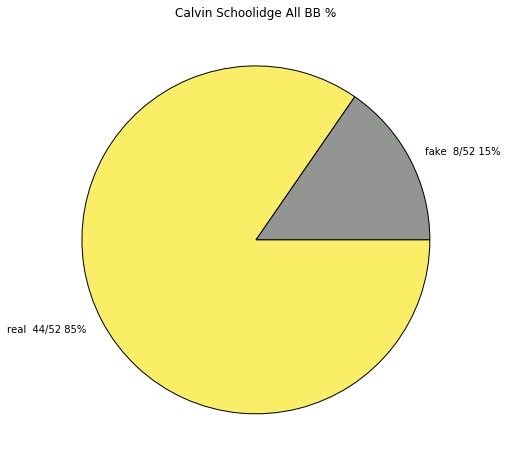

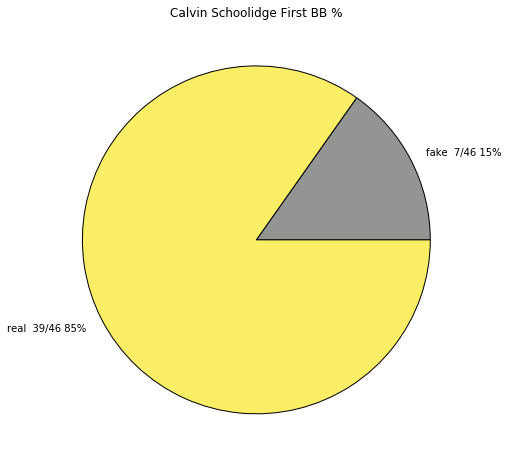

In [29]:
all_banana_bread_percentages(opp_spy_replays, f"{player} All BB %")
first_banana_bread_percentages(opp_spy_replays, f"{player} First BB %")

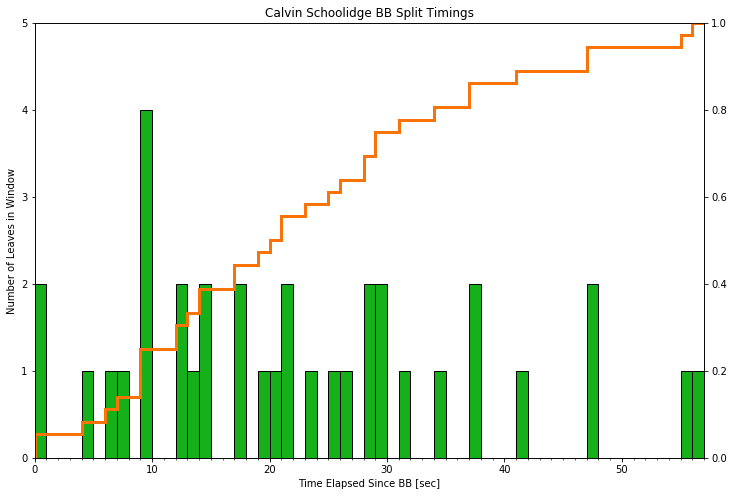

In [30]:
banana_split(opp_spy_replays, f"{player} BB Split Timings")

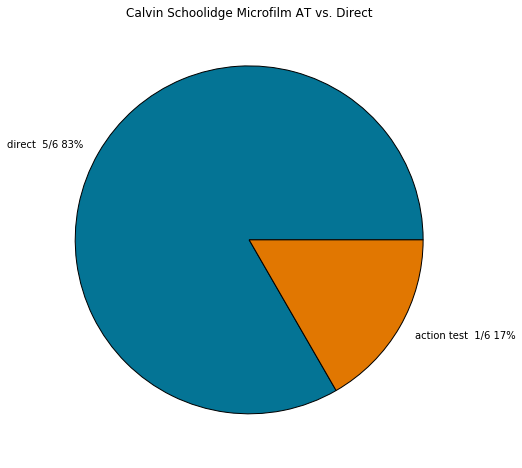

In [31]:
at_or_direct_mf(opp_spy_replays, f"{player} Microfilm AT vs. Direct")

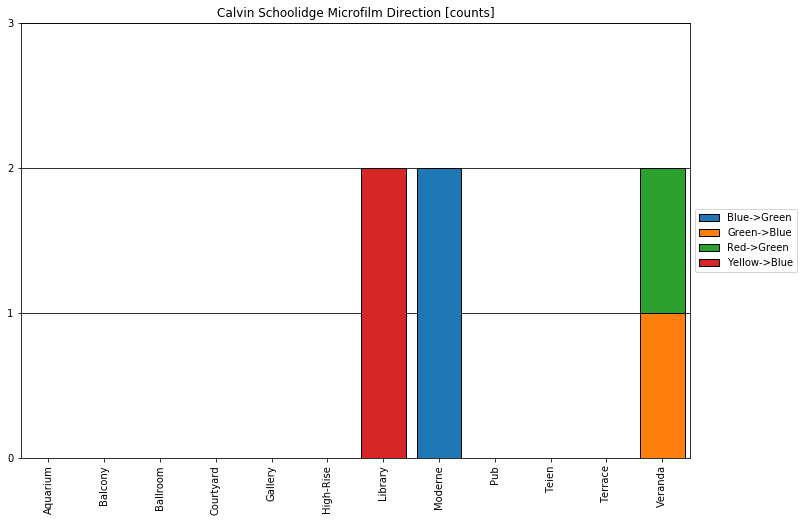

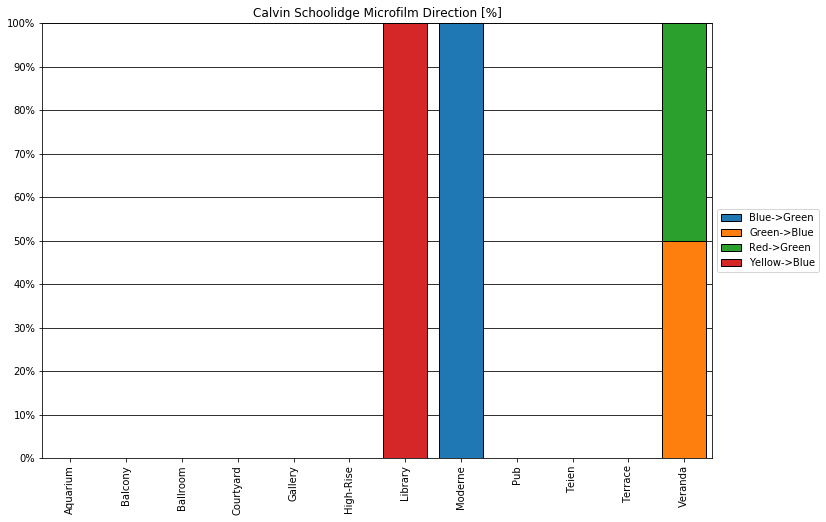

In [32]:
microfilm_direction(
    opp_spy_replays,
    f"{player} Microfilm Direction",
    groupby=lambda g: g.venue,
)

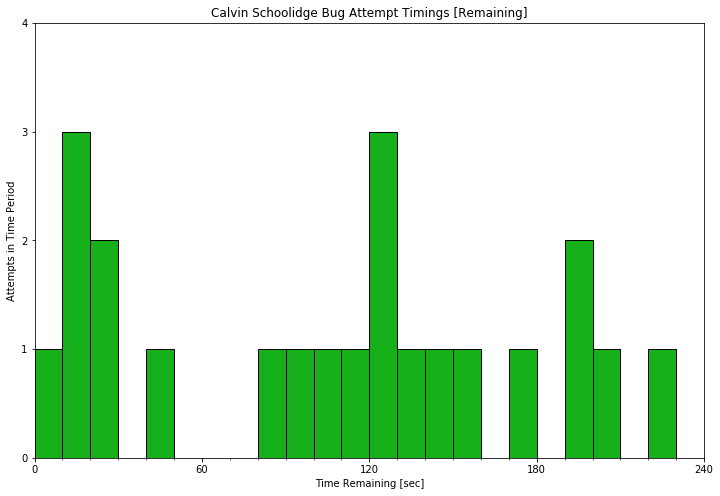

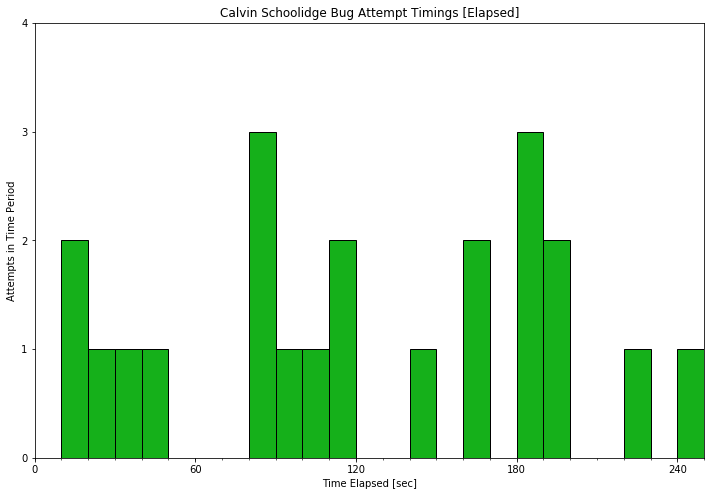

In [33]:
bug_attempt_timings(opp_spy_replays, f"{player} Bug Attempt Timings")

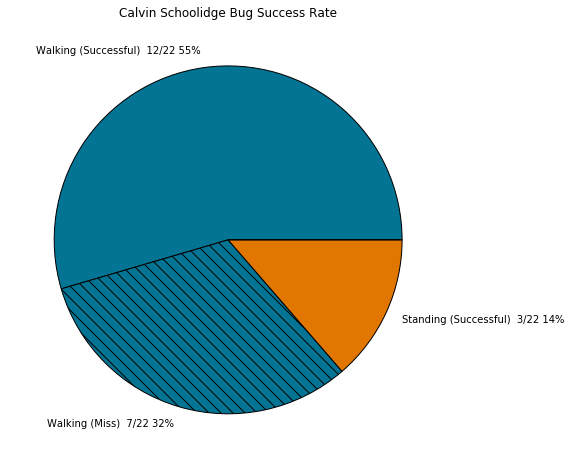

In [34]:
bug_success_rate(opp_spy_replays, f"{player} Bug Success Rate")

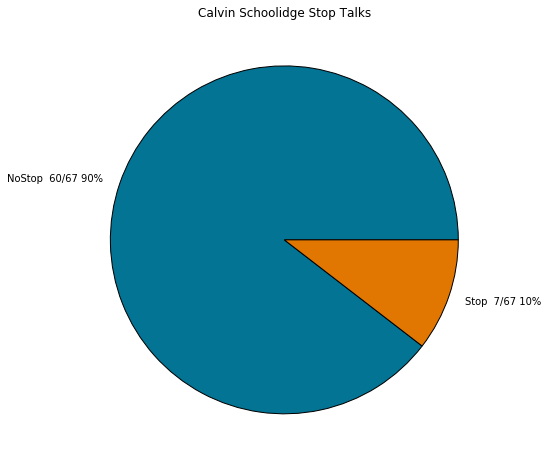

In [35]:
stop_talk_in_game_percentage(opp_spy_replays, f"{player} Stop Talks")

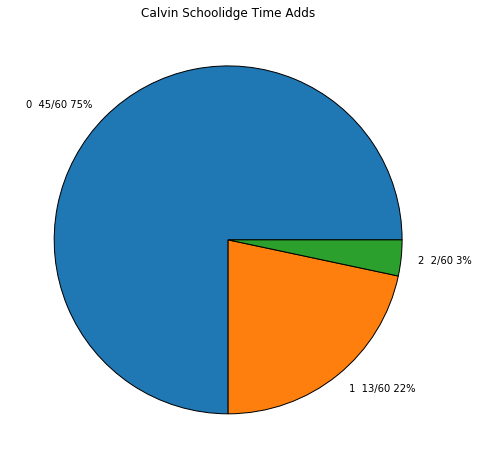

In [36]:
time_add_times_per_game(opp_spy_replays, f"{player} Time Adds")`

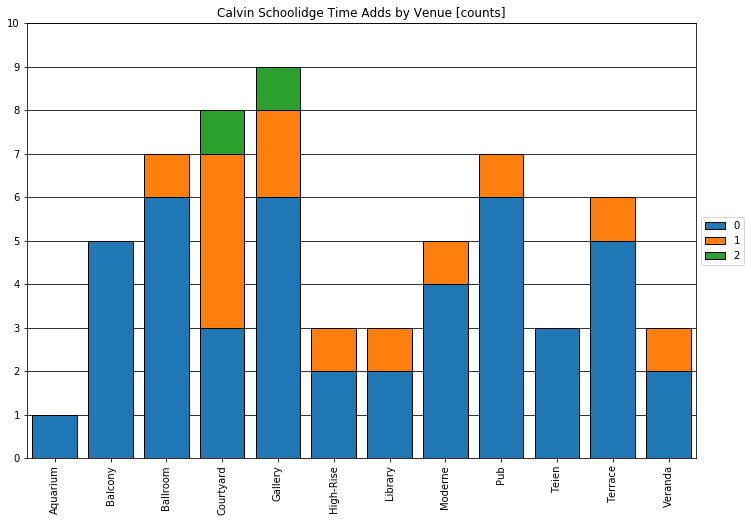

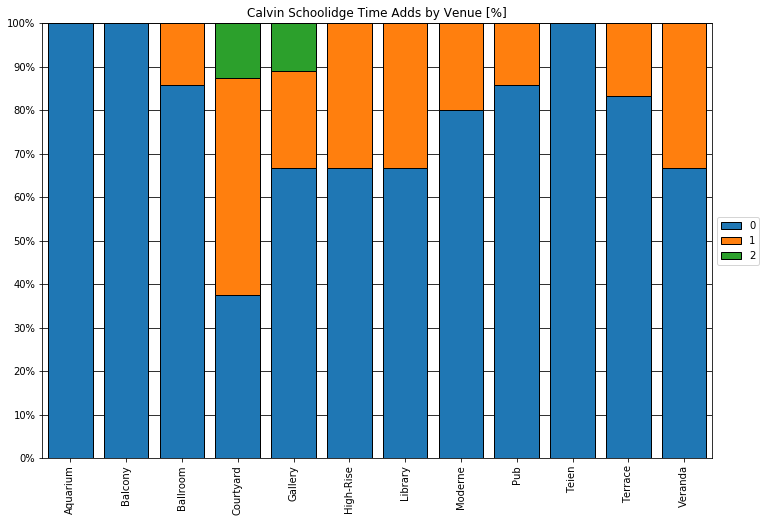

In [37]:
time_add_times_per_game(opp_spy_replays, f"{player} Time Adds by Venue", groupby=lambda g: g.venue)

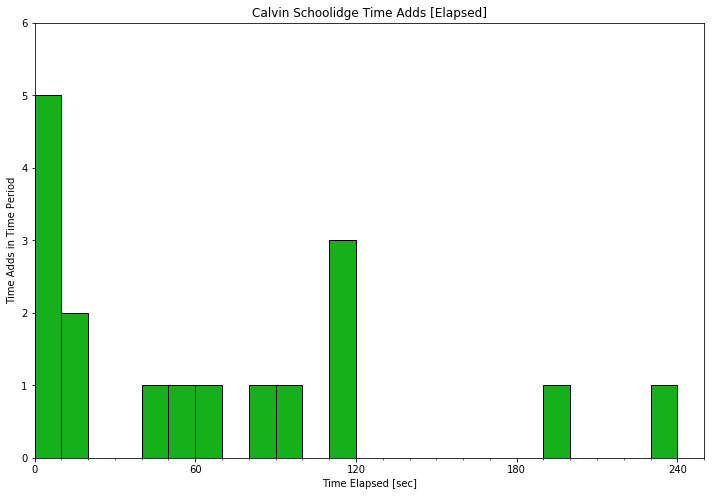

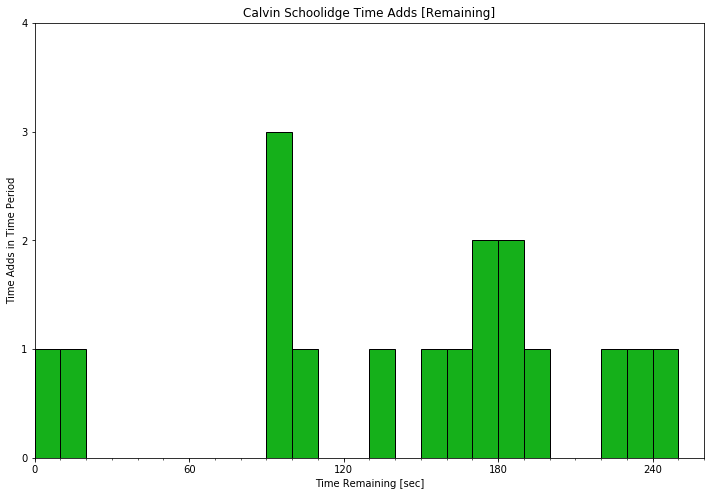

In [38]:
time_add_times(opp_spy_replays, f"{player} Time Adds")